In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
# import os
# import re

In [53]:
protMF25 = pd.read_table('MFTop25.txt').rename(columns={'pValue':'25'})[['GeneSet', '25']]
protMF50 = pd.read_table('MFTop50.txt').rename(columns={'pValue':'50'})[['GeneSet', '50']]
protMF100 = pd.read_table('MFTop100.txt').rename(columns={'pValue':'100'})[['GeneSet', '100']]
protMFAll = pd.read_table('MFTopAll.txt').rename(columns={'pValue':'All'})[['GeneSet', 'All']]

protMFs = [protMF25, protMF50, protMF100, protMFAll]

protMFDF = protMFs[0]
for protMF in protMFs[1:]:
    protMFDF = pd.merge(protMFDF, protMF, how='outer', on='GeneSet')

protMFDF['# NaN'] = protMFDF.isnull().sum(axis=1)
protMFDF = protMFDF.sort_values(by='# NaN', ascending=True).reset_index(drop=True)[:15]

GeneSetNew = [GeneSet.replace('_', ' ').lower().replace('go ', '') for GeneSet in protMFDF['GeneSet']]
protMFDF['GeneSet'] = GeneSetNew

#protMFDF

colNames = ['25', '50', '100', 'All']
for colName in colNames:
    protMFDF[colName] = [-(math.log(pvals, 10)) for pvals in protMFDF[colName]]
    
protMFDF

,GeneSet,25,50,100,All,# NaN
0,nadh dehydrogenase activity,3.705534,7.050610,15.931814,25.361511,0
1,enzyme binding,3.559091,4.021363,9.856985,19.309804,0
2,oxidoreductase activity acting on nad p h quin...,3.431798,6.490797,14.590067,22.725842,0
3,ribonucleotide binding,3.400117,5.394695,10.147520,19.554396,0
4,oxidoreductase activity acting on nad p h,NaN,5.472370,12.203426,21.457175,1
5,syntaxin binding,4.747147,5.472370,7.224754,NaN,1
6,snare binding,4.333482,4.920819,6.399027,NaN,1
7,transmembrane transporter activity,NaN,4.008331,6.565431,15.226214,1
8,transporter activity,NaN,4.181115,6.141463,17.440093,1
9,cation transmembrane transporter activity,NaN,4.240332,5.037631,11.970616,1


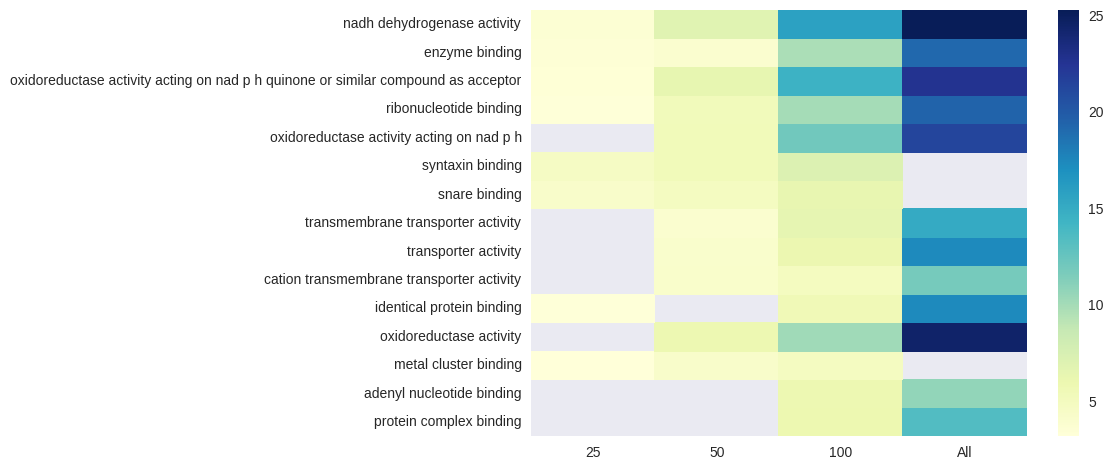

In [54]:
sns.heatmap(protMFDF.ix[:, 1:-1], cmap="YlGnBu", yticklabels=list(protMFDF['GeneSet']))

In [17]:
protBP25 = pd.read_table('BPTop25.txt').rename(columns={'pValue':'25'})[['GeneSet', '25']]
protBP50 = pd.read_table('BPTop50.txt').rename(columns={'pValue':'50'})[['GeneSet', '50']]
protBP100 = pd.read_table('BPTop100.txt').rename(columns={'pValue':'100'})[['GeneSet', '100']]
protBPAll = pd.read_table('BPTopAll.txt').rename(columns={'pValue':'All'})[['GeneSet', 'All']]

protBPs = [protBP25, protBP50, protBP100, protBPAll]

protBPDF = protBPs[0]
for protBP in protBPs[1:]:
    protBPDF = pd.merge(protBPDF, protBP, how='outer', on='GeneSet')

protBPDF['# NaN'] = protBPDF.isnull().sum(axis=1)
protBPDF = protBPDF.sort_values(by='# NaN', ascending=True).reset_index(drop=True)[:15]

GeneSetNew = [GeneSet.replace('_', ' ').lower().replace('go ', '') for GeneSet in protBPDF['GeneSet']]
protBPDF['GeneSet'] = GeneSetNew

colNames = ['25', '50', '100', 'All']
for colName in colNames:
    protBPDF[colName] = [-(math.log(pvals, 10)) for pvals in protBPDF[colName]]

protBPDF

,GeneSet,25,50,100,All,# NaN
0,small molecule metabolic process,6.677781,12.761954,22.552842,46.869666,0
1,organonitrogen compound metabolic process,NaN,9.353596,15.014574,47.365523,1
2,organophosphate metabolic process,NaN,7.467246,17.787812,39.028724,1
3,glycosyl compound metabolic process,NaN,6.829738,15.821023,38.274088,1
4,purine containing compound metabolic process,NaN,9.376751,18.163676,39.772113,1
5,nucleobase containing small molecule metabolic...,NaN,10.924453,18.477556,42.987163,1
6,protein complex subunit organization,6.021363,7.184422,NaN,24.198596,1
7,mitochondrial electron transport nadh to ubiqu...,NaN,6.869666,17.681937,30.793174,1
8,phosphate containing compound metabolic process,NaN,6.876148,14.943095,33.856985,1
9,establishment of localization in cell,6.872895,8.718967,NaN,24.815309,1


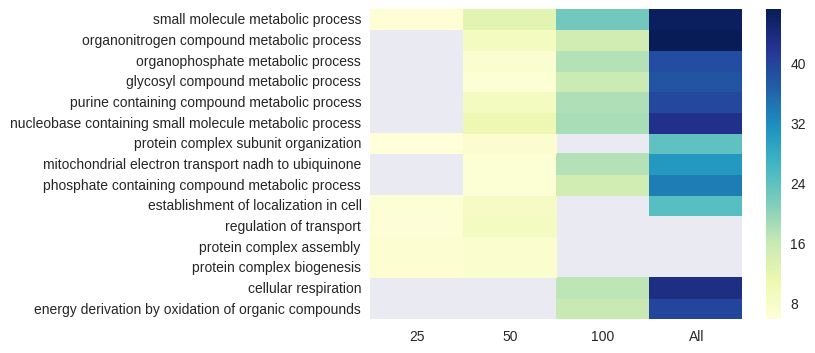

In [23]:
sns.heatmap(protBPDF.ix[:, 1:-1], cmap="YlGnBu", yticklabels=list(protBPDF['GeneSet']))

In [19]:
protCC25 = pd.read_table('CCTop25.txt').rename(columns={'pValue':'25'})[['GeneSet', '25']]
protCC50 = pd.read_table('CCTop50.txt').rename(columns={'pValue':'50'})[['GeneSet', '50']]
protCC100 = pd.read_table('CCTop100.txt').rename(columns={'pValue':'100'})[['GeneSet', '100']]
protCCAll = pd.read_table('CCTopAll.txt').rename(columns={'pValue':'All'})[['GeneSet', 'All']]

protCCs = [protCC25, protCC50, protCC100, protCCAll]

protCCDF = protCCs[0]
for protCC in protCCs[1:]:
    protCCDF = pd.merge(protCCDF, protCC, how='outer', on='GeneSet')

protCCDF['# NaN'] = protCCDF.isnull().sum(axis=1)
protCCDF = protCCDF.sort_values(by='# NaN', ascending=True).reset_index(drop=True)[:15]

GeneSetNew = [GeneSet.replace('_', ' ').lower().replace('go ', '') for GeneSet in protCCDF['GeneSet']]
protCCDF['GeneSet'] = GeneSetNew

colNames = ['25', '50', '100', 'All']
for colName in colNames:
    protCCDF[colName] = [-(math.log(pvals, 10)) for pvals in protCCDF[colName]]

protCCDF

,GeneSet,25,50,100,All,# NaN
0,mitochondrion,9.507240,13.341035,20.258061,53.787812,0
1,neuron part,7.917215,8.080399,15.503070,28.991400,0
2,mitochondrial part,7.580044,9.458421,19.469800,54.913640,0
3,mitochondrial matrix,7.114639,6.498941,9.924453,21.368556,0
4,cell projection,6.638272,7.388277,13.168770,25.950782,0
5,neuron projection,6.285670,6.139063,11.655608,25.066007,0
6,cell body,5.203426,7.215383,13.832683,20.266001,0
7,nadh dehydrogenase complex,NaN,6.869666,15.497573,28.651695,1
8,oxidoreductase complex,NaN,7.221849,13.982967,33.576754,1
9,synapse,4.323306,NaN,8.962574,17.939302,1


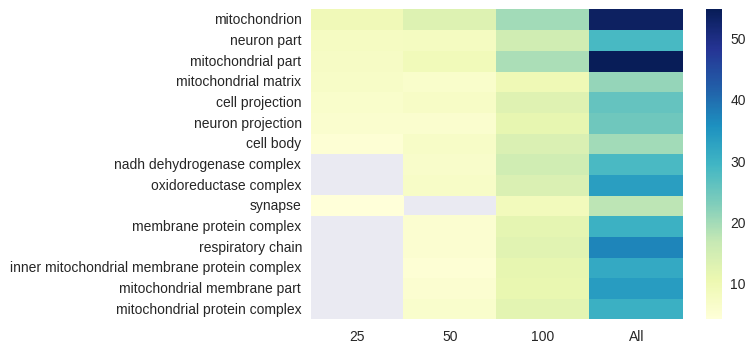

In [24]:
sns.heatmap(protCCDF.ix[:, 1:-1], cmap="YlGnBu", yticklabels=list(protCCDF['GeneSet']))

## Trial for Simpler Code

In [ ]:
# protMFdict = {}
# protBPdict = {}
# protCCdict = {}

# pValue = 'pValue'
# geneSet = 'GeneSet'
# colNames = ['25', '50', '100', 'All']

# for filename in os.listdir('data/GO_prot/'):
#     if filename.startswith('MF'):
#         keyName = re.findall(r'MFTop(\S*).txt', filename)[0]
#         protMFdict[keyName] = pd.read_table(filename).rename(columns={pValue:keyName})[[geneSet, keyName]]
#         protMFs = list(protMFdict.keys())
#         protMFDF = protMFdict[protMFs[0]]
#         for protMF in protMFs[1:]:
#             protMFDF = pd.merge(protMFDF, protMFdict[protMF], how='outer', on=geneSet)
#         protMFDF['# NaN'] = protMFDF.isnull().sum(axis=1)
#         protMFDF = protMFDF.sort_values(by='# NaN', ascending=True).reset_index(drop=True)[:15]

#         GeneSetNew = [GeneSet.replace('_', ' ').lower().replace('go ', '') for GeneSet in protMFDF['GeneSet']]
#         protMFDF['GeneSet'] = GeneSetNew

# protMFDF['25']
#         for colName in colNames:
#             protMFDF[colName] = [-(math.log(pvals, 10)) for pvals in protMFDF[colName]]

In [ ]:
# protMF25 = pd.read_table('MFTop25.txt').rename(columns={'pValue':'25'})[['GeneSet', '25']]
# protMF50 = pd.read_table('MFTop50.txt').rename(columns={'pValue':'50'})[['GeneSet', '50']]
# protMF100 = pd.read_table('MFTop100.txt').rename(columns={'pValue':'100'})[['GeneSet', '100']]
# protMFAll = pd.read_table('MFTopAll.txt').rename(columns={'pValue':'All'})[['GeneSet', 'All']]

# protMFs = [protMF25, protMF50, protMF100, protMFAll]

# protMFDF = protMFs[0]
# for protMF in protMFs[1:]:
#     protMFDF = pd.merge(protMFDF, protMF, how='outer', on='GeneSet')